In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tif
import carreno.viz.vol as wf
from skimage.transform import resize

# Data visualisation
See prediction plots to visualize performance

## visualisation 2D

In [31]:
pred2D = tif.imread("../data/output/unet2D_pred.tif")
pred3D = tif.imread("../data/output/unet3D_pred.tif")
x = tif.imread("../data/dataset/input/slik3.tif")
y = tif.imread("../data/dataset/target/slik3.tif")

In [43]:
def plot_slice(volumes, titles, slc=20, ncol=3):
    plt.figure(figsize=(10,10))
    
    nline = np.ceil(len(volumes) / ncol).astype(int)
    
    for i in range(len(volumes)):
        plt.subplot(nline, ncol, i+1)
        try:
            plt.title(titles[i])
        except:
            pass
        if volumes[i].dtype == bool:
            plt.imshow(volumes[i][slc].astype(float))
        else:
            plt.imshow(volumes[i][slc])

    plt.show()

for slice 25


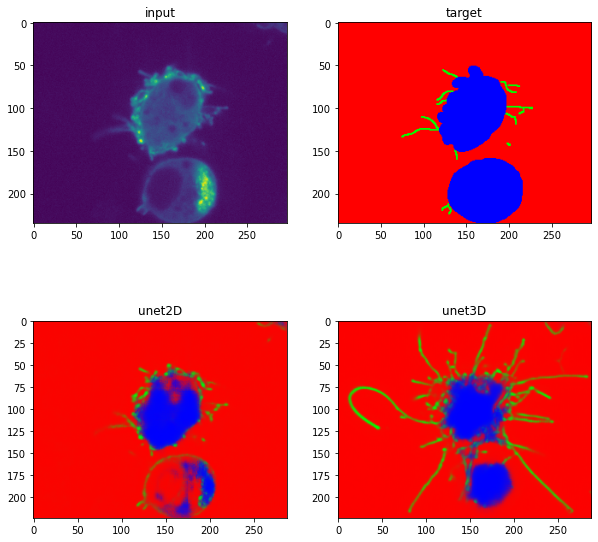

In [47]:
z = 25
print('for slice', z)
plot_slice([x, y, pred2D, pred3D], ['input','target','unet2D','unet3D'], slc=z, ncol=2)

In [50]:
print(x.shape, y.shape, pred2D.shape, pred3D.shape)

(39, 235, 297) (39, 235, 297, 3) (39, 224, 288, 3) (64, 224, 288, 3)


3D pred seems off because of shape, resize to fix

In [53]:
rpred2D = resize(pred2D, y.shape)
rpred3D = resize(pred3D, y.shape)

for slice 15


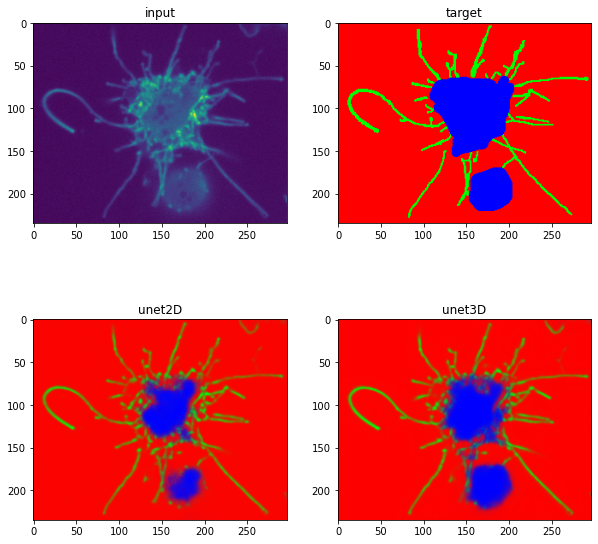

In [58]:
z = 15
print('for slice', z)
plot_slice([x, y, rpred2D, rpred3D], ['input','target','unet2D','unet3D'], slc=z, ncol=2)

for slice 20


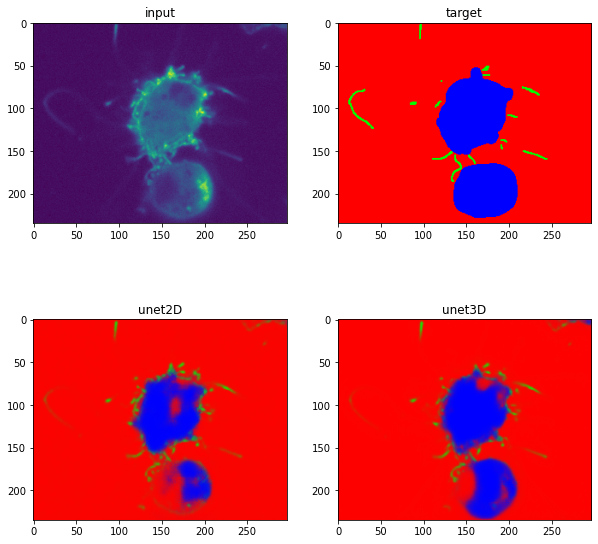

In [59]:
z = 20
print('for slice', z)
plot_slice([x, y, rpred2D, rpred3D], ['input','target','unet2D','unet3D'], slc=z, ncol=2)

for slice 25


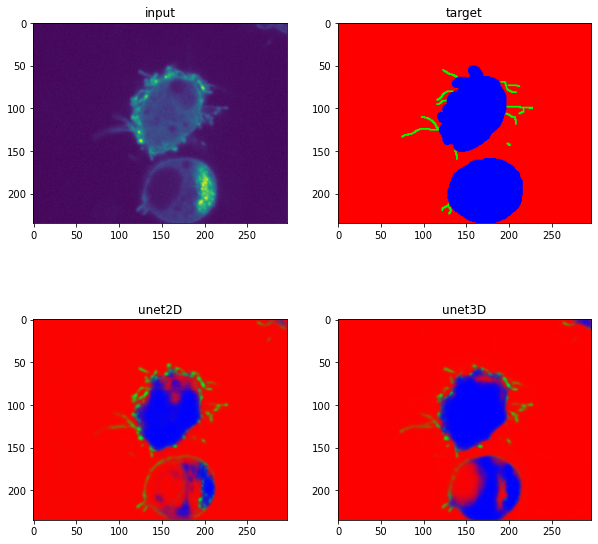

In [60]:
z = 25
print('for slice', z)
plot_slice([x, y, rpred2D, rpred3D], ['input','target','unet2D','unet3D'], slc=z, ncol=2)

## Visualise 3D
Volume to wavefront format and display triangular mesh  
(use Three.js?)

In [81]:
from skimage.measure import marching_cubes
import matplotlib.pyplot as plt

def ndarray2obj(pred, angle=[0,0], prec=2):
    obj = []
    fig = plt.figure(figsize=(20,20))

    # 1 channel at a time
    nch = pred.shape[-1]
    for ch in range(nch):
        vol_ch = pred[..., ch]
        verts, faces, normals, values = marching_cubes(vol_ch, step_size=prec)
        
        # add subplot
        ax = fig.add_subplot(1, nch, ch+1, projection='3d')
        # add mesh
        ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2], linewidth=0.2, antialiased=True)
        # place camera
        ax.view_init(*angle)
        # clip space
        ax.set_xlim(0, vol_ch.shape[0])
        ax.set_ylim(0, vol_ch.shape[1])
        ax.set_zlim(0, vol_ch.shape[2])

        obj.append([
            verts,
            faces,
            normals,
            values
        ])

    plt.show()

    return obj


def write_obj(filename, v, f, n):
    # https://stackoverflow.com/questions/48844778/create-a-obj-file-from-3d-array-in-python
    faces = f.copy()
    if 0 in faces:
        faces += 1

    obj_file = open(filename, 'w')
    for item in v:
        obj_file.write("v {0} {1} {2}\n".format(item[0], item[1], item[2]))

    for item in n:
        obj_file.write("vn {0} {1} {2}\n".format(item[0], item[1], item[2]))

    for item in faces:
        obj_file.write("f {0}//{0} {1}//{1} {2}//{2}\n".format(item[0], item[1], item[2]))  

    obj_file.close()

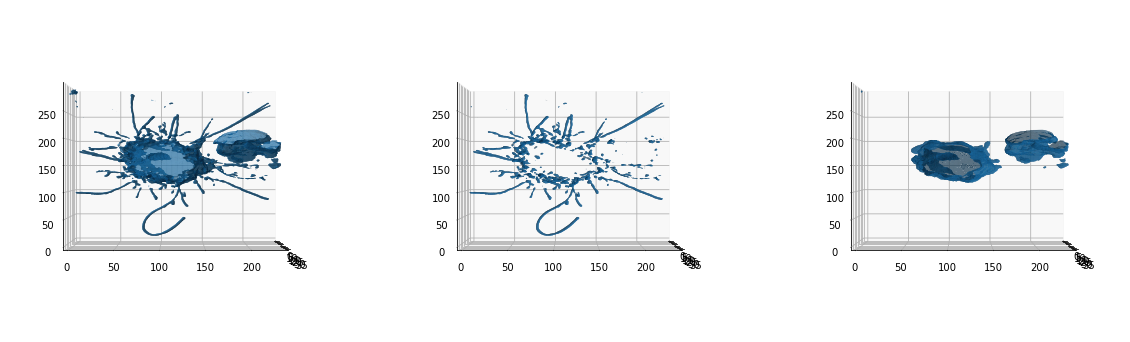

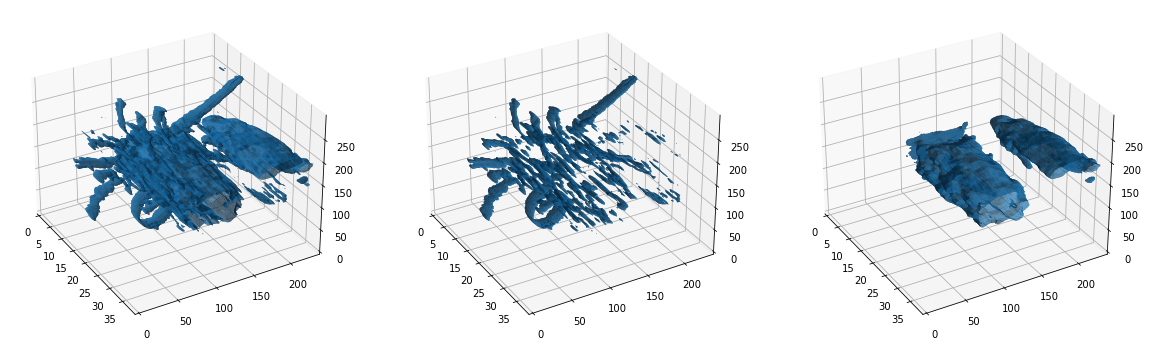

In [86]:
# 2d pred
items = ndarray2obj(rpred2D, prec=1)
items = ndarray2obj(rpred2D, [30,-30], prec=1)

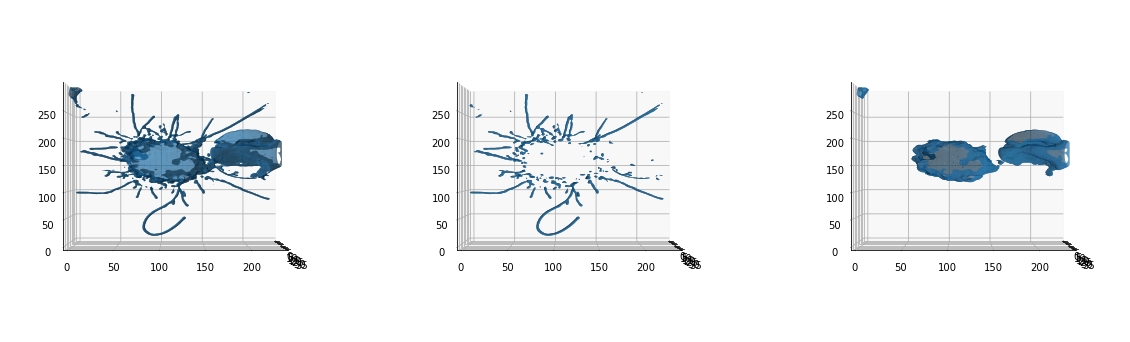

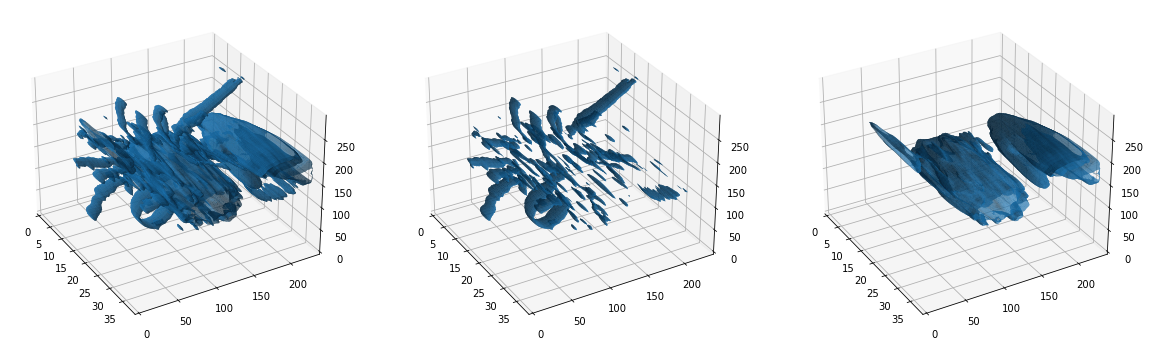

In [87]:
# 3d pred
items = ndarray2obj(rpred3D, prec=1)
items = ndarray2obj(rpred3D, [30,-30], prec=1)

body and cytonemes seem too thick the big cytoneme bottom right is cutoff in the middle  
how does it look like in annotation?

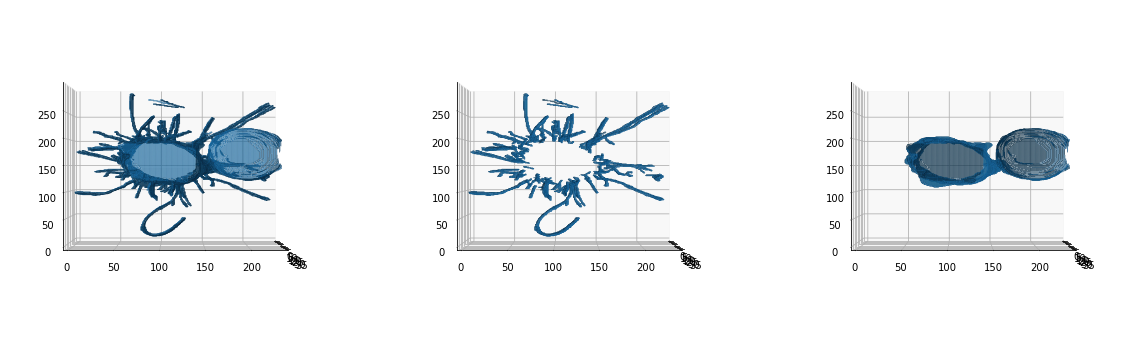

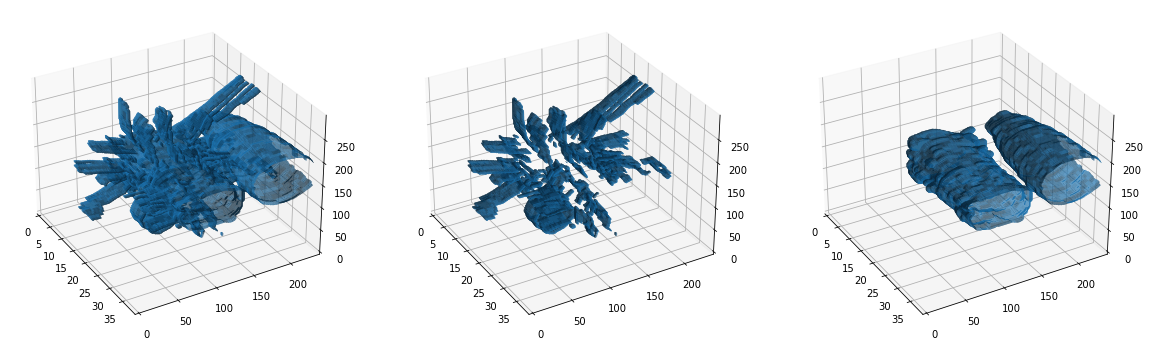

In [83]:
# target
items = ndarray2obj(y, prec=1)
items = ndarray2obj(y, [30,-30], prec=1)